# Title: Predict the best region for a new well

##  Introduction

This project is for the OilyGiant mining company. Our task is to find the best place for a new well.
Steps to choose the location:
•	Collect the oil well parameters in the selected region: oil quality and volume of reserves;
•	Build a model for predicting the volume of reserves in the new wells;
•	Pick the oil wells with the highest estimated values;
•	Pick the region with the highest total profit for the selected oil wells.
We have data on oil samples from three regions. Parameters of each oil well in the region are already known. Our aim is to build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.
 This project consists of following steps:
 - Data loading and preprocessing
 - Train and test the model
 - Calculate profit
 - Calculate profit from a set of selected oil wells and model predictions
 - Calculate risks and profit for each region

### First Stage : Data loading and preprocessing
 In this stage import all the libraries needed for the analysis and also load the dataframe and identify the contents in the dataframe. Check whether there are any duplicates in the data or any missing values and check the data types are appropriate for each column.

In [1]:
#Import all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from numpy.random import RandomState

In [2]:
#Load the data
region_0=pd.read_csv('/datasets/geo_data_0.csv')
display(region_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [3]:
#Load the data
region_1=pd.read_csv('/datasets/geo_data_1.csv')
display(region_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [4]:
#Load the data
region_2=pd.read_csv('/datasets/geo_data_2.csv')
display(region_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Load all the dataframes and named as region_1, region_2, region_3 and each dataframe consists of 100000 rows and 5 columns. The 5 columns are
- id — unique oil well identifier
- f0, f1, f2 — three features of points
- product — volume of reserves in the oil well (thousand barrels).

In [5]:
# Check for information for region 0
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
# Check for information for region 1
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# Check for information for region 2
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
#Check for missing values for region_0
region_0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [9]:
#Check for missing values for region_1
region_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
#Check for missing values for region_2
region_2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
#Check for duplicates for region_0
region_0.duplicated().sum()

0

In [12]:
#Check for duplicates for region_1
region_1.duplicated().sum()

0

In [13]:
#Check for duplicates for region_2
region_2.duplicated().sum()

0

In [14]:
# Define function to plot histogram to show the distribution of numerical features
def  hist(x):
    x.hist(figsize=(20,15),bins=30)
    plt.show()

Histograms are used to identify the distribution of each feature and the product.

In [15]:
# Define function to plot boxplot to identify outliers
def boxplot(y):
    sns.boxplot(data=y[['f0','f1','f2','product']])
    plt.title('Boxplot to identify outliers')
    plt.ylabel('Values')
    plt.show()

Boxplots helps to identify the outliers and spread of data.  A boxplot is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

In [16]:
#Define function to plot corelation heatmap displays corelation between quantitative features:
def heatmap(z):
    plt.figure(figsize=(12,10))
    sns.heatmap(z.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()

Visualize corelation betwwen different features.

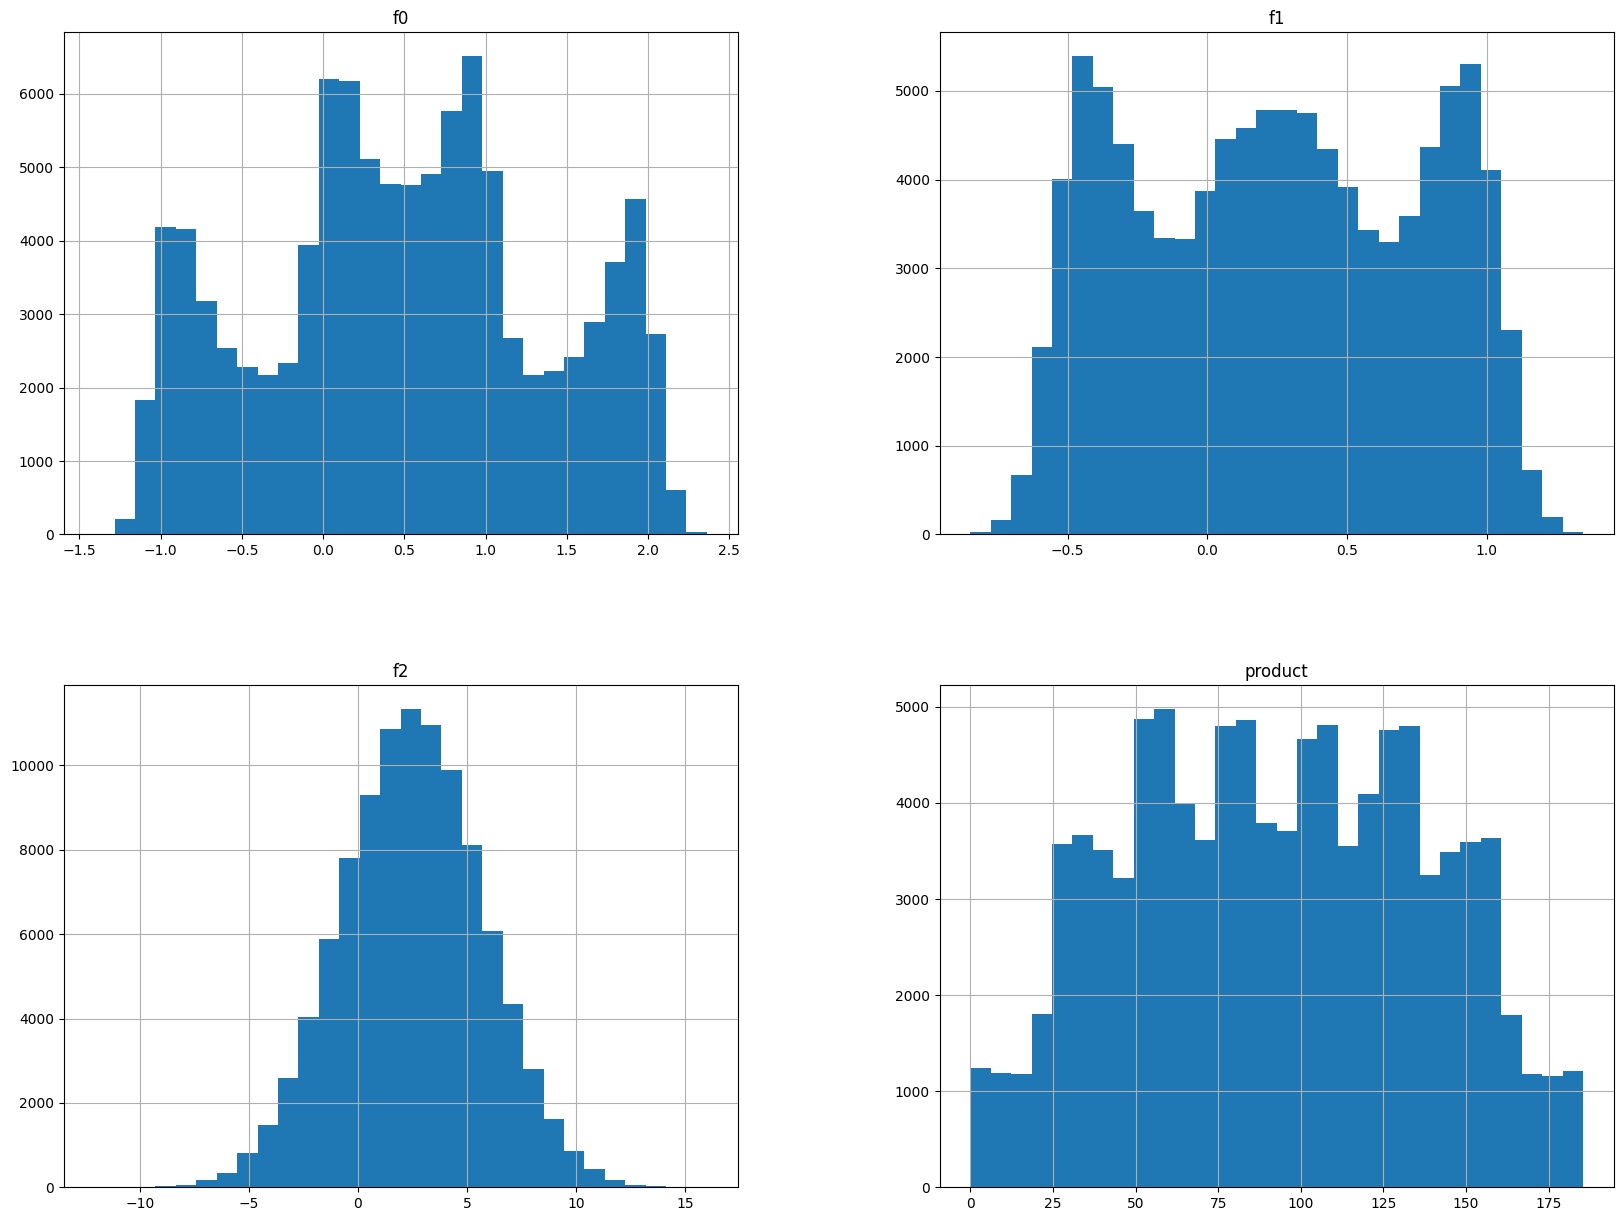

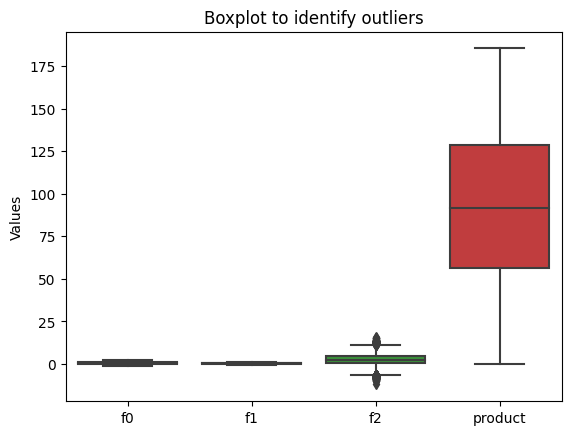

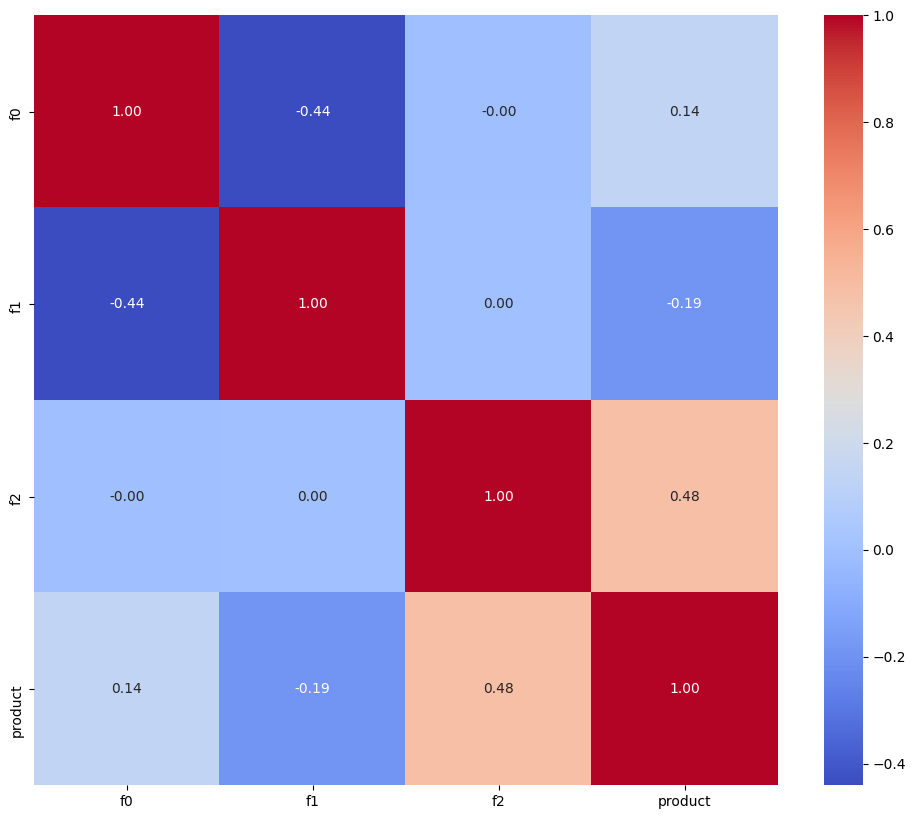

In [17]:
# Plot histogram, boxplot and heatmap for region_0
hist(region_0)
boxplot(region_0)
heatmap(region_0)

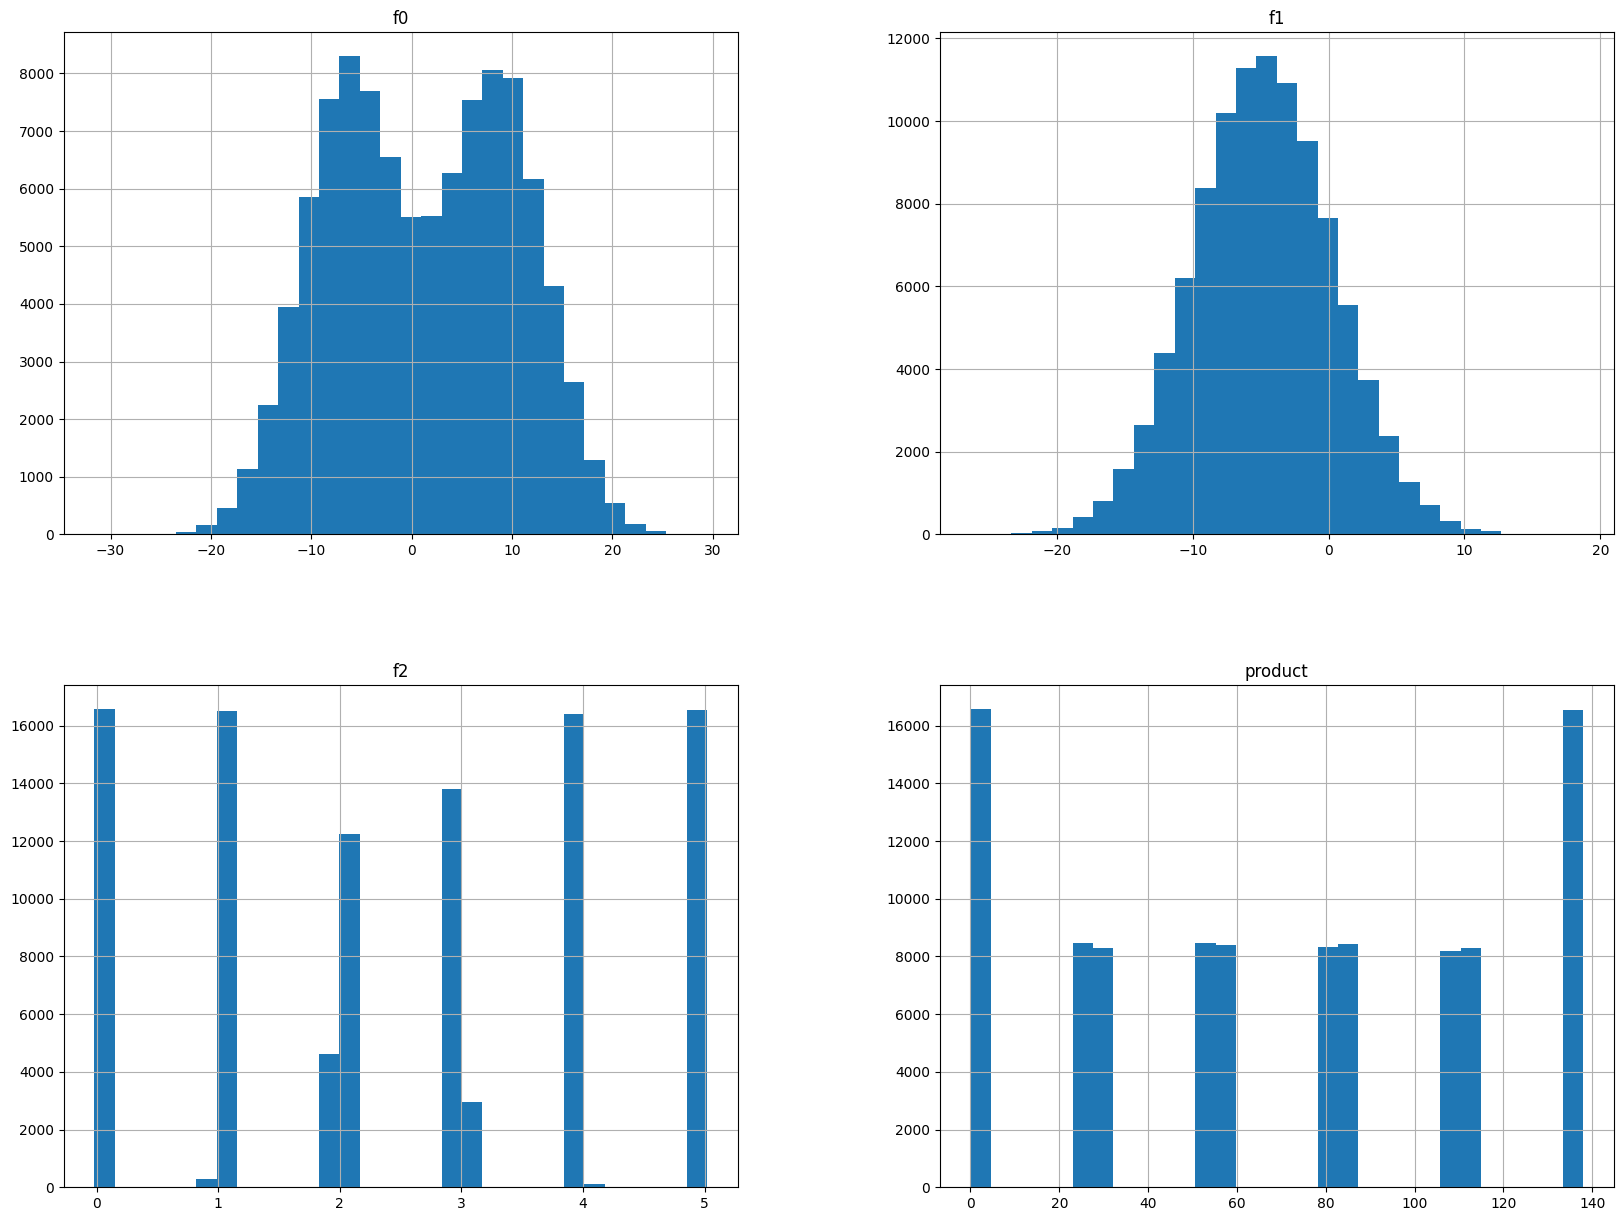

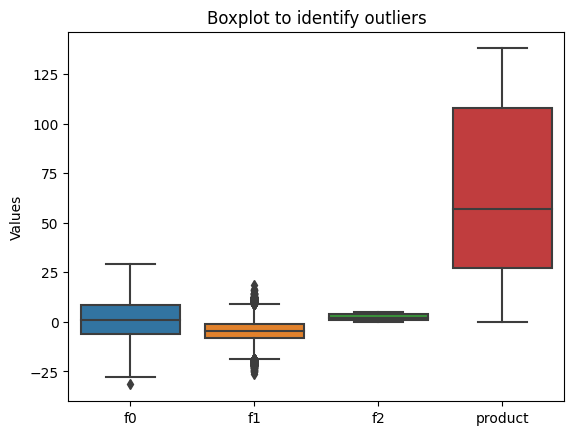

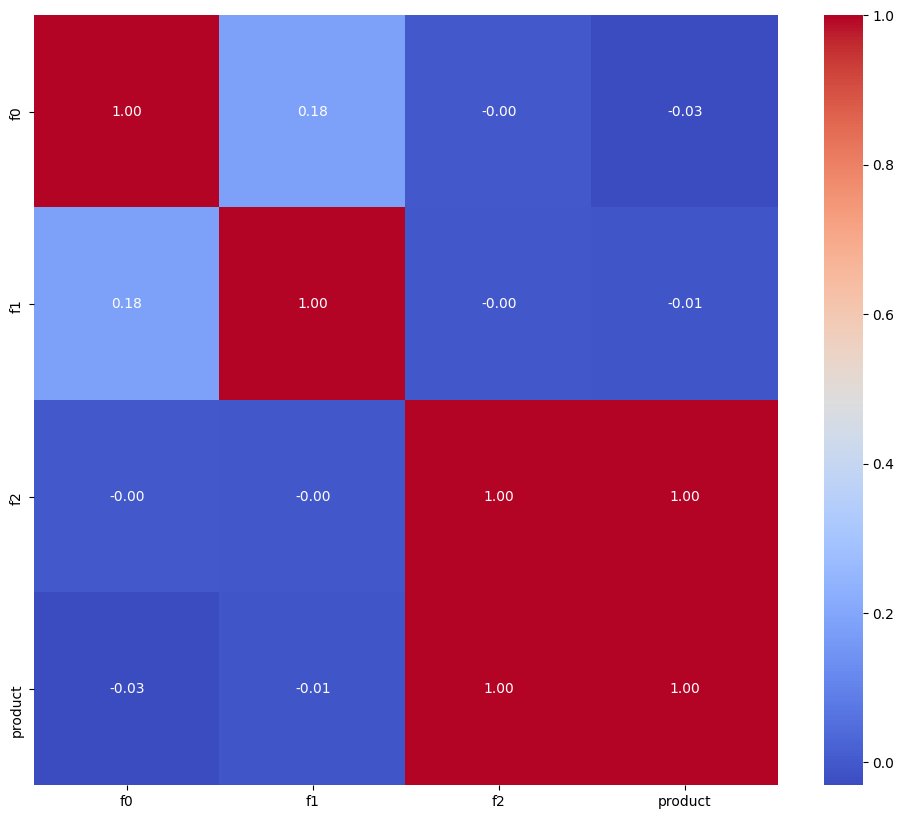

In [18]:
# Plot histogram, boxplot and heatmap for region_1
hist(region_1)
boxplot(region_1)
heatmap(region_1)

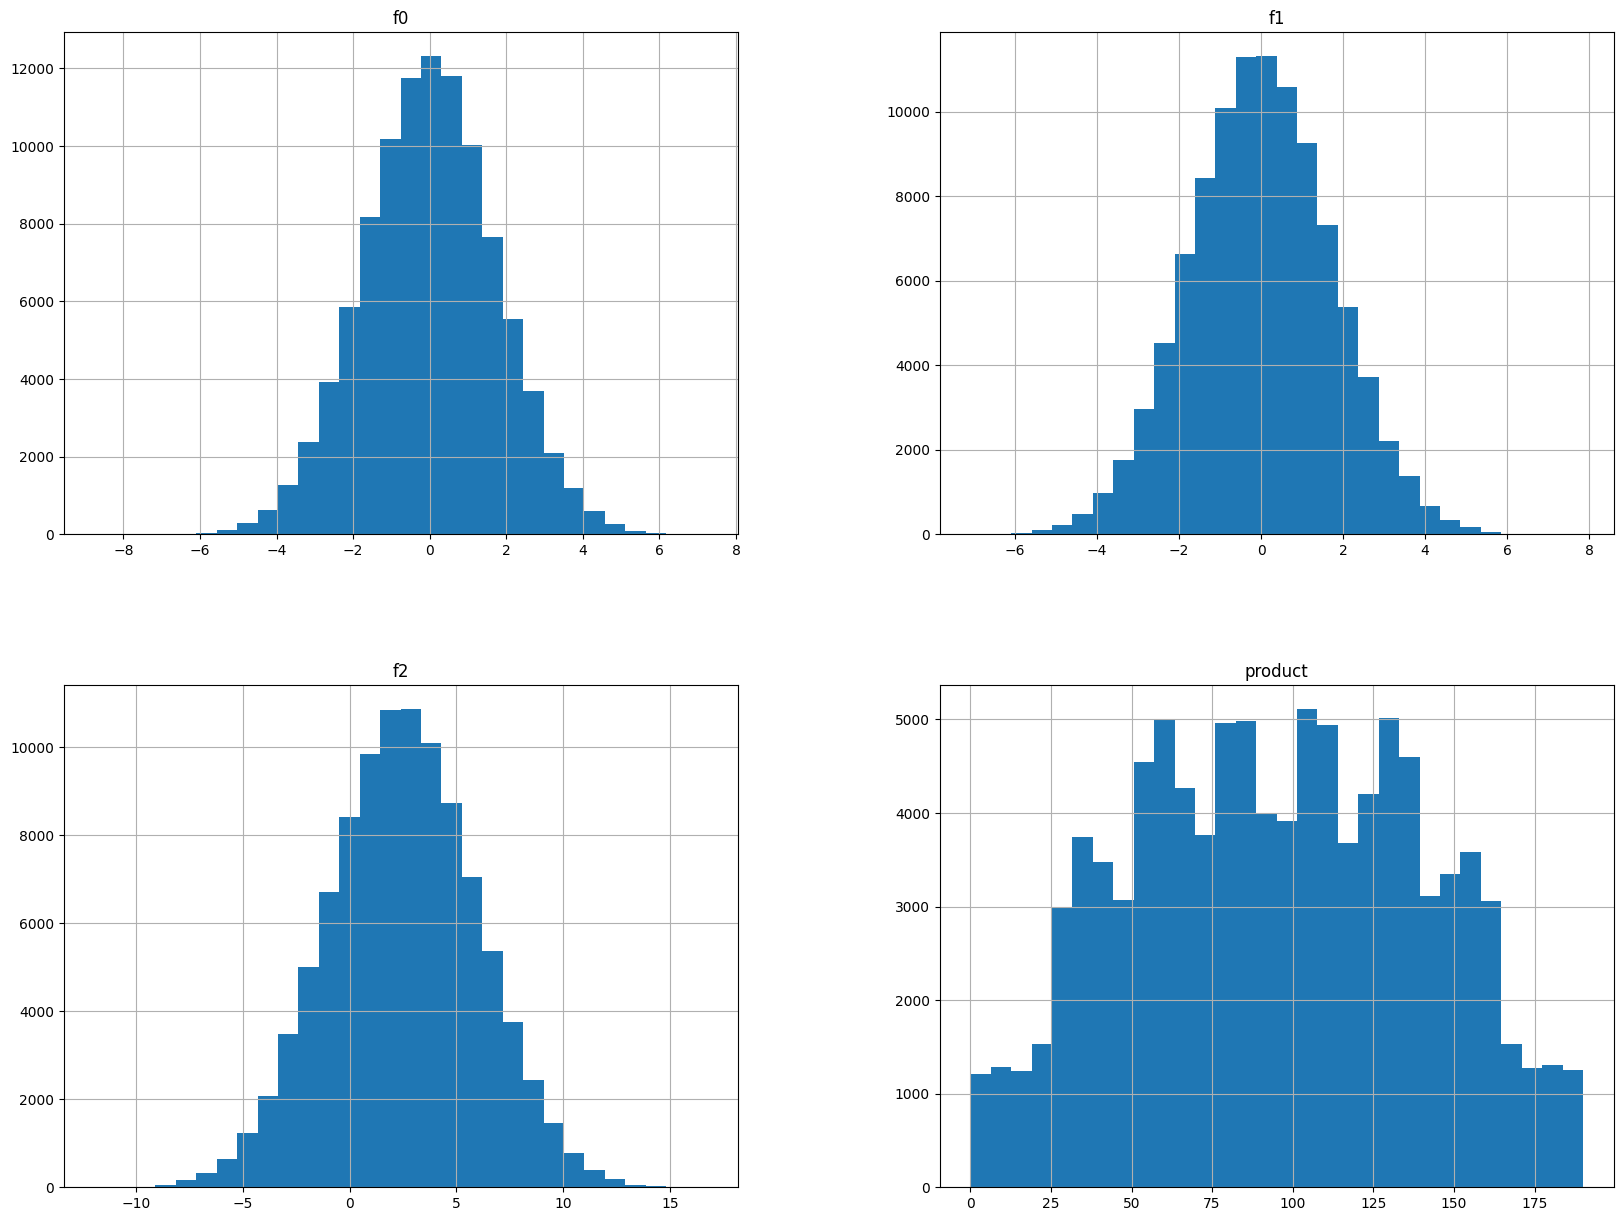

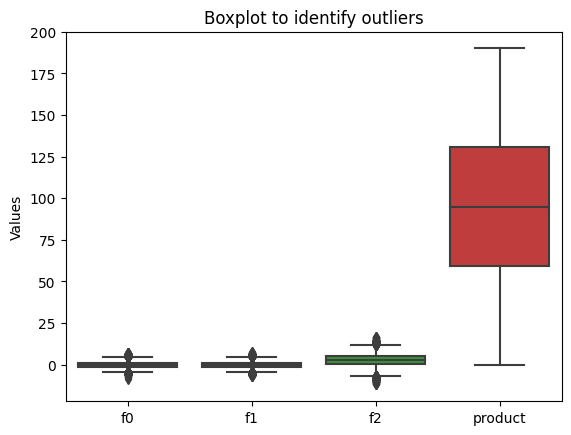

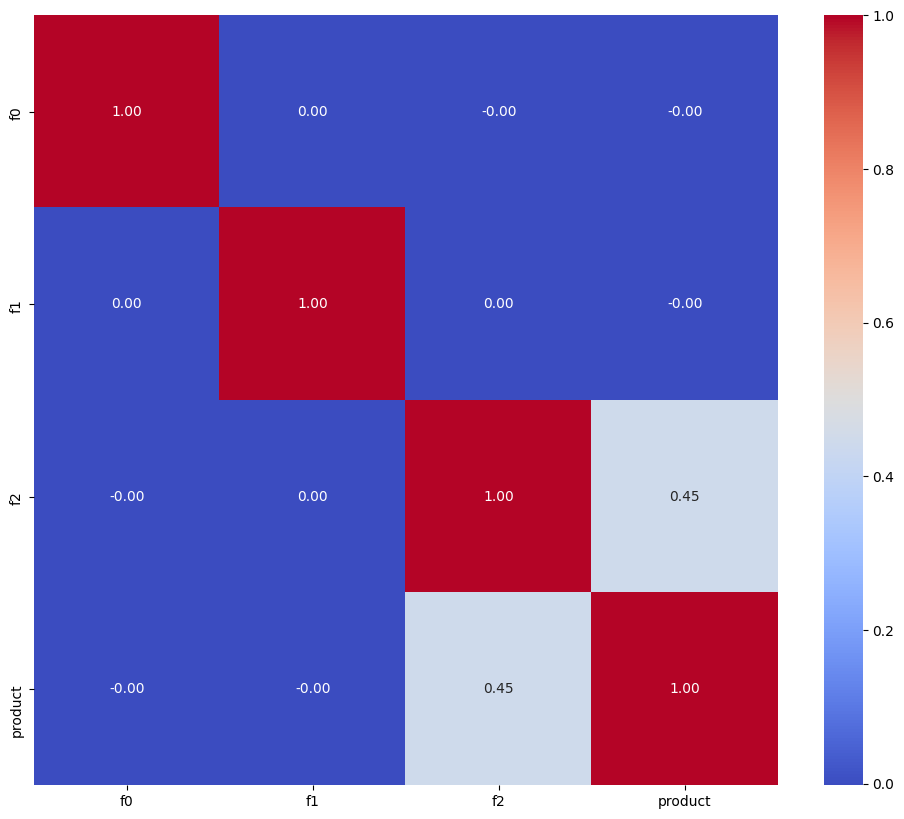

In [20]:
# Plot histogram, boxplot and heatmap for region_2
hist(region_2)
boxplot(region_2)
heatmap(region_2)

In this stage, load all the important libraries and load the data of all regions. Also check the datatypes, missing values and any duplicate values. After preprocessing, conduct exploratory analysis of the data. Plot histogram to find the distribution of the data and boxplot to find the outliers.

### Second Stage:Train and test the model

In this stage, the source data is divided into training dataset(75%) and validation set(25%). Then train the model and predict the validation set. Also find the average volume of predicted reserves and model RMSE.

In [21]:
#Function to train and test the model
def split_scale_train(region):
    #Splitting data into training and validation sets
    region_train, region_valid = train_test_split(region, test_size=0.25,  random_state=12345)
    #Separating features and target variables
    features_train = region_train.drop(['id','product'],axis=1)
    target_train = region_train['product']
    features_valid = region_valid.drop(['id','product'],axis=1)
    target_valid = region_valid['product']
    #Defininig numerical variables for scaling
    numeric = ['f0', 'f1', 'f2']
    #Scaling the numeric features
    scaler=StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] =scaler.transform(features_train[numeric])
    features_valid[numeric] =scaler.transform(features_valid[numeric])
    #Training the model
    model = LinearRegression()
    model.fit(features_train, target_train)
    #Making predictions on the validation set
    predictions=model.predict(features_valid)
    #Save the predictions and correct answers for the validation set.
    results =pd.DataFrame({'predictions':predictions, 'actual':target_valid})                  
    rmse =mean_squared_error(target_valid, predictions)**0.5
    avg =predictions.mean()
    
    #Printing the results
    print(f'The predictions and correct answers for the validation set is \n {results}')
    print(f'The model RMSE is {rmse}')
    print(f'The average volume of predicted reserves is {avg}')
   
    return results, rmse,avg


In [22]:
#For region_0
results, rmse,avg = split_scale_train(region_0)

The predictions and correct answers for the validation set is 
        predictions      actual
71751    95.894952   10.038645
80493    77.572583  114.551489
2655     77.892640  132.603635
53233    90.175134  169.072125
91141    70.510088  122.325180
...            ...         ...
12581   103.037104  170.116726
18456    85.403255   93.632175
73035    61.509833  127.352259
63834   118.180397   99.782700
43558   118.169392  177.821022

[25000 rows x 2 columns]
The model RMSE is 37.5794217150813
The average volume of predicted reserves is 92.59256778438035


In [23]:
#Save the predictions and correct answers for the validation set for region 0
predictive_model_0=results

In [24]:
#For region_1
results, rmse,avg=split_scale_train(region_1)

The predictions and correct answers for the validation set is 
        predictions      actual
71751    82.663314   80.859783
80493    54.431786   53.906522
2655     29.748760   30.132364
53233    53.552133   53.906522
91141     1.243856    0.000000
...            ...         ...
12581   136.869211  137.945408
18456   110.693465  110.992147
73035   137.879341  137.945408
63834    83.761966   84.038886
43558    53.958466   53.906522

[25000 rows x 2 columns]
The model RMSE is 0.893099286775617
The average volume of predicted reserves is 68.728546895446


In [25]:
#Save the predictions and correct answers for the validation set for region 1
predictive_model_1=results

In [26]:
#For region_2
results, rmse,avg=split_scale_train(region_2)

The predictions and correct answers for the validation set is 
        predictions      actual
71751    93.599633   61.212375
80493    75.105159   41.850118
2655     90.066809   57.776581
53233   105.162375  100.053761
91141   115.303310  109.897122
...            ...         ...
12581    78.765887   28.492402
18456    95.603394   21.431303
73035    99.407281  125.487229
63834    77.779912   99.422903
43558   129.032417  127.445075

[25000 rows x 2 columns]
The model RMSE is 40.02970873393434
The average volume of predicted reserves is 94.96504596800489


In [27]:
#Save the predictions and correct answers for the validation set for region 2
predictive_model_2=results

### Third Stage:Calculate profit

In this stage store all key values for calculations in separate variables.Then calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.Provide the findings about the preparation for profit calculation step.

In [28]:
# Identify all key values for calculations 
budget = 100000000
revenue_per_barrel = 4500
wells =200

In [29]:
# Calculate the volume of reserves sufficient for developing a new well without losses.
volume_of_reserves = budget/(revenue_per_barrel * wells)
print(f'The volume of reserves sufficient for developing a new well without losses is {volume_of_reserves}')

The volume of reserves sufficient for developing a new well without losses is 111.11111111111111


In [30]:
#Compare the obtained value with the average volume of reserves in each region.
def avg_volume(region):
    avg_volume=region['product'].mean()
    print(f'The average volume for region is {avg_volume}')
    if avg_volume > volume_of_reserves:
        print('Meet the requirement')
    else:
        print('Not met the requirement')

In [31]:
#For region_0
avg_volume(region_0)

The average volume for region is 92.50000000000001
Not met the requirement


In [32]:
#For region_1
avg_volume(region_1)

The average volume for region is 68.82500000000002
Not met the requirement


In [33]:
#For region_2
avg_volume(region_2)

The average volume for region is 95.00000000000004
Not met the requirement


Our comparison shown that none of the regions have an average reserves volume that meets or exceeds the required volume of reserves 111.11 thousand barrels. However, Region 2 has the closest average reserves 95 thousand barrels to the required volume.So region 2 is promising, but before finalizing we want to perform profit calculation and risk analysis.

### Fourth Stage:Calculate profit from a set of selected oil wells and model predictions

In this stage Write a function to calculate profit from a set of selected oil wells and model predictions:
- Pick the wells with the highest values of predictions. 
- Summarize the target volume of reserves in accordance with these predictions
- Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [34]:
def profit(predictive_model):
    #Top 200 from the model
    top_200=predictive_model.sort_values(by='predictions', ascending=False).head(200)
    #Calculate profit
    total_reserves =top_200['actual'].sum()
    profit=total_reserves*revenue_per_barrel - budget
    
    return profit

In [35]:
#For region_0
print(f'The profit for obtained volume of reserves {profit(predictive_model_0)}')

The profit for obtained volume of reserves 33208260.43139851


In [36]:
#For region_1
print(f'The profit for obtained volume of reserves {profit(predictive_model_1)}')

The profit for obtained volume of reserves 24150866.966815114


In [37]:
#For region_2
print(f'The profit for obtained volume of reserves {profit(predictive_model_2)}')

The profit for obtained volume of reserves 27103499.635998324


In this stage, we pick the wells with highest value of predictions and calculate the profit for each region. The obtained profit for volume of reserves is 
- For region 0 :33208260.43139851
- For region 1 :24150866.966815114
- For region 2 :27103499.635998324

From the above values, region 0 obtains highest profit and we can select that region for well"s development.

### Fifth stage:Calculate risks and profit for each region

In this stage calculate risks and profit for each region:
- Use the bootstrapping technique with 1000 samples to find the distribution of profit.
- Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
- Provide findings: suggest a region for development of oil wells and justify the choice.

In [42]:
def bootstrap_profit(predictive_model, num_iterations=1000):
    profits = []  # List to store profits from each iteration

    for _ in range(num_iterations):
        # Sample with replacement
        bootstrap_sample = predictive_model.sample(
            n=500,  # Sample the same size as the data
            replace=True
        )
        
        # Sort by predictions and select top 200 wells
        top_200 = bootstrap_sample.sort_values(
            by='predictions', 
            ascending=False
        ).head(200)
        
        # Calculate total actual reserves from those top 200 wells
        total_reserves = top_200['actual'].sum()
      

        # Calculate profit: reserves * price per unit - fixed costs
        profit = total_reserves * 4500 - 100_000_000
       
        profits.append(profit)

    # After collecting all profits, calculate the statistics:
    mean_profit = np.mean(profits)  # Average profit
    lower_bound = np.percentile(profits, 2.5)  # 2.5th percentile (lower bound of 95% CI)
    upper_bound = np.percentile(profits, 97.5)  # 97.5th percentile (upper bound of 95% CI)

    # Calculate risk of loss: proportion of negative profits
    risk_of_loss = (np.array(profits) < 0).mean() * 100  # Expressed as a percentage

    return mean_profit, lower_bound, upper_bound, risk_of_loss

In [43]:
predictive_model = predictive_model_0

# Call the function to get profit distribution metrics
mean_profit, lower_bound, upper_bound, risk_of_loss = bootstrap_profit(predictive_model, num_iterations=1000)

# Output the results
print(f"Mean Profit: {mean_profit:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"Risk of Loss: {risk_of_loss:.2f}%")

Mean Profit: 3785654.40
95% Confidence Interval: (-1259770.57, 8810359.37)
Risk of Loss: 7.40%


In [44]:
predictive_model = predictive_model_1
# Call the function to get profit distribution metrics
mean_profit, lower_bound, upper_bound, risk_of_loss = bootstrap_profit(predictive_model, num_iterations=1000)

# Output the results
print(f"Mean Profit: {mean_profit:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"Risk of Loss: {risk_of_loss:.2f}%")

Mean Profit: 4544409.72
95% Confidence Interval: (516889.66, 8494640.26)
Risk of Loss: 1.10%


In [45]:
predictive_model = predictive_model_2
# Call the function to get profit distribution metrics
mean_profit, lower_bound, upper_bound, risk_of_loss = bootstrap_profit(predictive_model, num_iterations=1000)

# Output the results
print(f"Mean Profit: {mean_profit:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"Risk of Loss: {risk_of_loss:.2f}%")

Mean Profit: 3958374.99
95% Confidence Interval: (-1329148.35, 8942343.32)
Risk of Loss: 6.60%



In this stage we calculate risks and profit for each region:The obtained mean profit for each region is 
- For region 0 :3785654.40
- For region 1 :4544409.72
- For region 2 :3958374.99

The risk of loss for each region is 
- For region 0 :7.4%
- For region 1 :1.10%
- For region 2 :6.60%

From the above values, region 1 obtains highest profit and risk of loss less than 2.5% and we can select that region for well"s development.

## Conclusion:

Our project is for the OilyGiant mining company to find the best place for a new well.We have data on oil samples from three regions. Parameters of each oil well in the region are already known. Our aim is to build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.This project consists of following steps:
 - Data loading and preprocessing
 - Train and test the model
 - Calculate profit
 - Calculate profit from a set of selected oil wells and model predictions
 - Calculate risks and profit for each region

In the first stage, we initialize the data and load all the libraries to perform the task. After that we preprocess the data and check whether any duplicates or missing values. Then conduct the exploratory data analysis and plot
 - Histograms  to identify the distribution of each feature and the product.
 - Boxplots to identify the outliers and spread of data.
 - Heatmaps to visualize corelation betwwen different features.

In the second stage, the source data is divided into training dataset(75%) and validation set(25%). Then train the model and predict the validation set. Also find the average volume of predicted reserves and model RMSE.
 - For region_0
     * The model RMSE is 37.5794217150813
     * The average volume of predicted reserves is 92.59256778438035
 - For region_1 
     * The model RMSE is 0.893099286775617
     * The average volume of predicted reserves is 68.728546895446
 - For region_2
     * The model RMSE is 40.02970873393434
     * The average volume of predicted reserves is 94.96504596800489 
   
In the third stage, store all key values for calculations in separate variables.Then calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region. Our comparison shown that none of the regions have an average reserves volume that meets or exceeds the required volume of reserves 111.11 thousand barrels. However, Region 2 has the closest average reserves 95 thousand barrels to the required volume.So region 2 is promising, but before finalizing we want to perform profit calculation and risk analysis.
   
In the fourth stage, calculate profit from a set of selected oil wells and model predictions. In this stage, we pick the wells with highest value of predictions and calculate the profit for each region. The obtained profit for volume of reserves is 
- For region 0 :33208260.43139851
- For region 1 :24150866.966815114
- For region 2 :27103499.635998324

From the above values, region 0 obtains highest profit and we can select that region for well"s development.

In the fifth satge, calculate risks and profit for each region. For this, use the bootstrapping technique with 1000 samples to find the distribution of profit.Find average profit, 95% confidence interval and risk of losses. 
The obtained mean profit for each region is 
- For region 0 :3785654.40
- For region 1 :4544409.72
- For region 2 :3958374.99

The risk of loss for each region is 
- For region 0 :7.4%
- For region 1 :1.10%
- For region 2 :6.60%

From the above values, region 1 obtains highest profit and risk of loss less than 2.5% and we can select that region for well"s development.